In [210]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
data = pd.read_csv("transfusion.csv" )
#data.head()
data = data.drop(data.columns[0], axis=1)
#data.head()
X = data.drop('Don',axis=1).values
y = data['Don'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=233)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = MLPClassifier(hidden_layer_sizes = 12, max_iter = 2000, activation = "identity")
model.fit(X_train,y_train)
pred = model.predict(X_test)
matrice = confusion_matrix(y_test,pred)
print(matrice)
#print(classification_report(y_test,pred))

np.diag(matrice).sum()/matrice.sum()

[[189   6]
 [ 45   7]]


0.7935222672064778

Application de Tensorflow

In [211]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [192]:
X_train.shape

(501, 4)

In [259]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [260]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
16/16 [==============================] - 1s 22ms/step - loss: 0.6865 - val_loss: 0.6525
Epoch 2/600
16/16 [==============================] - 0s 6ms/step - loss: 0.6493 - val_loss: 0.6171
Epoch 3/600
16/16 [==============================] - 0s 6ms/step - loss: 0.6249 - val_loss: 0.5866
Epoch 4/600
16/16 [==============================] - 0s 5ms/step - loss: 0.5844 - val_loss: 0.5606
Epoch 5/600
16/16 [==============================] - 0s 7ms/step - loss: 0.5828 - val_loss: 0.5433
Epoch 6/600
16/16 [==============================] - 0s 10ms/step - loss: 0.5685 - val_loss: 0.5305
Epoch 7/600
16/16 [==============================] - 0s 9ms/step - loss: 0.5538 - val_loss: 0.5202
Epoch 8/600
16/16 [==============================] - 0s 7ms/step - loss: 0.5414 - val_loss: 0.5133
Epoch 9/600
16/16 [==============================] - 0s 7ms/step - loss: 0.5466 - val_loss: 0.5078
Epoch 10/600
16/16 [==============================] - 0s 6ms/step - loss: 0.5634 - val_loss: 0.5031
Epoch 1

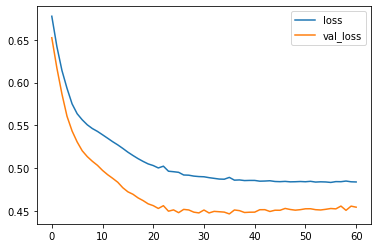

In [261]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

In [262]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       195
           1       0.68      0.33      0.44        52

    accuracy                           0.83       247
   macro avg       0.76      0.64      0.67       247
weighted avg       0.81      0.83      0.80       247

[[187   8]
 [ 35  17]]
